In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.simplefilter('ignore')
np.random.seed(42)  
%matplotlib inline  

In [2]:
ds=pd.read_csv("Trainingset.csv")
ds.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,...,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


In [3]:
new_ds = ds.filter(['unnamed: 0','age','bmi','gender','weight','glucose_apache''d1_glucose_min','ventilated_apache','arf_apache','d1_wbc_max','d1_creatinine_min','d1_glucose_max','diabetes_mellitus'])
new_ds.head()

,age,bmi,gender,weight,ventilated_apache,arf_apache,d1_wbc_max,d1_creatinine_min,d1_glucose_max,diabetes_mellitus
0,68.0,22.732803,M,73.9,0,0,14.1,2.23,168.0,1
1,77.0,27.421875,F,70.2,1,0,23.3,0.56,145.0,1
2,25.0,31.952749,F,95.3,0,0,NaN,NaN,NaN,0
3,81.0,22.635548,F,61.7,1,0,9.0,NaN,185.0,0
4,19.0,NaN,M,NaN,0,0,NaN,NaN,NaN,0


In [4]:
new_ds['gender']=new_ds['gender'].map({'M':'1','F':'2'},na_action=None)
new_ds.head()

,age,bmi,gender,weight,ventilated_apache,arf_apache,d1_wbc_max,d1_creatinine_min,d1_glucose_max,diabetes_mellitus
0,68.0,22.732803,1,73.9,0,0,14.1,2.23,168.0,1
1,77.0,27.421875,2,70.2,1,0,23.3,0.56,145.0,1
2,25.0,31.952749,2,95.3,0,0,NaN,NaN,NaN,0
3,81.0,22.635548,2,61.7,1,0,9.0,NaN,185.0,0
4,19.0,NaN,1,NaN,0,0,NaN,NaN,NaN,0


In [5]:
new_ds.isnull().sum()

age                   4988
bmi                   4490
gender                  66
weight                3463
ventilated_apache        0
arf_apache               0
d1_wbc_max           17429
d1_creatinine_min    13273
d1_glucose_max        8243
diabetes_mellitus        0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(new_ds)
newds=imputer.transform(new_ds)
newds=pd.DataFrame(newds)
newds.head()

,0,1,2,3,4,5,6,7,8,9
0,68.0,22.732803,1.0,73.9,0.0,0.0,14.1,2.23,168.0,1.0
1,77.0,27.421875,2.0,70.2,1.0,0.0,23.3,0.56,145.0,1.0
2,25.0,31.952749,2.0,95.3,0.0,0.0,11.1,0.94,150.0,0.0
3,81.0,22.635548,2.0,61.7,1.0,0.0,9.0,0.94,185.0,0.0
4,19.0,27.564749,1.0,80.0,0.0,0.0,11.1,0.94,150.0,0.0


In [7]:
newds.columns=new_ds.columns
newds.head()

,age,bmi,gender,weight,ventilated_apache,arf_apache,d1_wbc_max,d1_creatinine_min,d1_glucose_max,diabetes_mellitus
0,68.0,22.732803,1.0,73.9,0.0,0.0,14.1,2.23,168.0,1.0
1,77.0,27.421875,2.0,70.2,1.0,0.0,23.3,0.56,145.0,1.0
2,25.0,31.952749,2.0,95.3,0.0,0.0,11.1,0.94,150.0,0.0
3,81.0,22.635548,2.0,61.7,1.0,0.0,9.0,0.94,185.0,0.0
4,19.0,27.564749,1.0,80.0,0.0,0.0,11.1,0.94,150.0,0.0


In [8]:
newds.isnull().sum().sum()

0

In [9]:
newds['diabetes_mellitus'].value_counts()

0.0    102006
1.0     28151
Name: diabetes_mellitus, dtype: int64

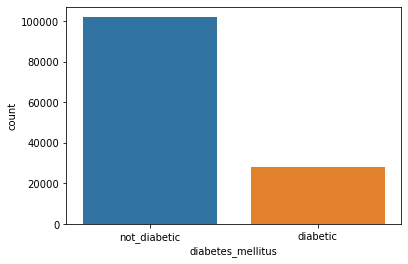

In [10]:
g = sns.countplot(newds['diabetes_mellitus'])
g.set_xticklabels(['not_diabetic','diabetic'])
plt.show()

In [11]:
x=newds.drop(['diabetes_mellitus'],axis=1)
y=newds.diabetes_mellitus
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [12]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', y_train.value_counts())
print('Resample dataset shape', y_ros.value_counts())


Original dataset shape 0.0    81618
1.0    22507
Name: diabetes_mellitus, dtype: int64
Resample dataset shape 1.0    102006
0.0    102006
Name: diabetes_mellitus, dtype: int64


# EDA

In [13]:
corrmat=newds.corr()
corrmat

,age,bmi,gender,weight,ventilated_apache,arf_apache,d1_wbc_max,d1_creatinine_min,d1_glucose_max,diabetes_mellitus
age,1.000000,-0.082357,0.031858,-0.124352,0.031688,0.000779,-0.003752,0.071504,0.016600,0.078922
bmi,-0.082357,1.000000,0.040535,0.874949,0.070335,-0.004368,0.023878,0.066530,0.096604,0.166325
gender,0.031858,0.040535,1.000000,-0.244931,-0.024780,-0.005596,0.003552,-0.090316,0.007546,-0.005946
weight,-0.124352,0.874949,-0.244931,1.000000,0.070358,-0.011260,0.018219,0.082238,0.086513,0.153495
ventilated_apache,0.031688,0.070335,-0.024780,0.070358,1.000000,0.002961,0.180925,0.030413,0.103419,0.011903
arf_apache,0.000779,-0.004368,-0.005596,-0.011260,0.002961,1.000000,-0.008592,0.517989,0.025425,0.108469
d1_wbc_max,-0.003752,0.023878,0.003552,0.018219,0.180925,-0.008592,1.000000,0.048621,0.155040,0.007035
d1_creatinine_min,0.071504,0.066530,-0.090316,0.082238,0.030413,0.517989,0.048621,1.000000,0.083325,0.123873
d1_glucose_max,0.016600,0.096604,0.007546,0.086513,0.103419,0.025425,0.155040,0.083325,1.000000,0.400065
diabetes_mellitus,0.078922,0.166325,-0.005946,0.153495,0.011903,0.108469,0.007035,0.123873,0.400065,1.000000


<AxesSubplot:>

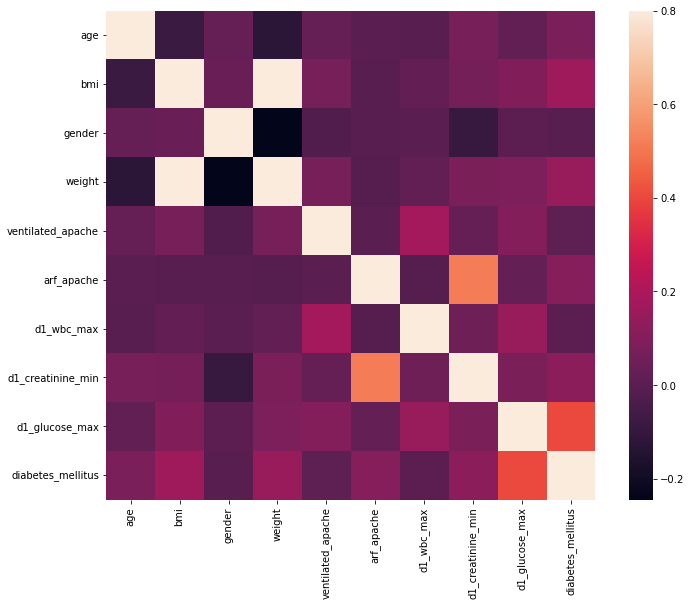

In [14]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

<AxesSubplot:>

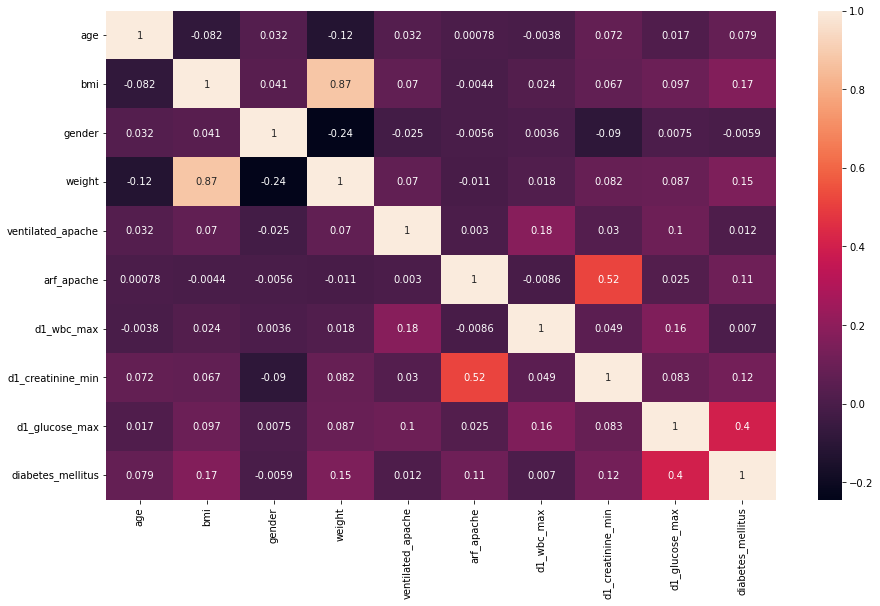

In [15]:
plt.figure(figsize = (15,9))
sns.heatmap(newds.corr(), annot = True)

In [16]:
corr = newds.corr()
corr["diabetes_mellitus"].sort_values(ascending=False)

diabetes_mellitus    1.000000
d1_glucose_max       0.400065
bmi                  0.166325
weight               0.153495
d1_creatinine_min    0.123873
arf_apache           0.108469
age                  0.078922
ventilated_apache    0.011903
d1_wbc_max           0.007035
gender              -0.005946
Name: diabetes_mellitus, dtype: float64

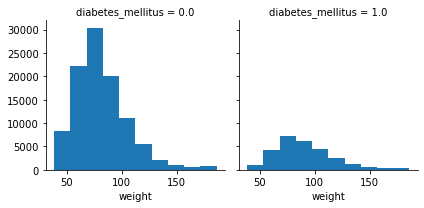

In [17]:
g = sns.FacetGrid(newds, col='diabetes_mellitus')
g.map(plt.hist, 'weight', bins=10)

# Applying ml  algorithms

In [18]:
newds['diabetes_mellitus'].value_counts()

0.0    102006
1.0     28151
Name: diabetes_mellitus, dtype: int64

In [18]:
x=newds.drop(['diabetes_mellitus'],axis=1)
y=newds.diabetes_mellitus

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_ros, y_ros,test_size=0.2,random_state=42)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [20]:
knn = KNeighborsClassifier()

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

ada = AdaBoostClassifier()

gb = GradientBoostingClassifier(n_estimators=20,random_state=10,max_features=10,max_depth=10)

xgb =XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)

#knn
para_knn = {'n_neighbors':np.arange(1, 20)}  #parameters of knn
rs_knn =  RandomizedSearchCV(knn, param_distributions=para_knn, cv=5) #search knn for 5 fold cross validation

#Decision Tree
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
rs_dt =  RandomizedSearchCV(dt, param_distributions=para_dt, cv=5) #randomized search decision tree for 5 fold cv

#random forest
params_rf = {'n_estimators':[100,200], 'min_samples_leaf':[1, 10]}
#rs_rf =  RandomizedSearchCV(rf, param_distributions=params_rf, cv=5)
grid_rf =  GridSearchCV(rf, param_grid=params_rf, cv=5)

#AdaBoost
params_ada = {'n_estimators': [50,100], 'learning_rate': [0.2,0.5]}
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5)
#rs_ada =  RandomizedSearchCV(ada, param_distributions=params_ada, cv=5)

#GradientBoost
params_gb = {'n_estimators':[50,100], 'learning_rate': [0.2,0.5]}
rs_gb = RandomizedSearchCV(gb, param_distributions=params_gb, cv = 5)

#XGBoost
params_xgb = {'n_estimators': [50,100], 'learning_rate': [0.2,0.5]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)

In [21]:
rs_knn.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [22]:
rs_dt.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_leaf': [1, 2, 4, 5, 10, 20,
                                                             30, 40, 80, 100]})

In [23]:
grid_rf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 10],
                         'n_estimators': [100, 200]})

In [24]:
grid_ada.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.2, 0.5],
                         'n_estimators': [50, 100]})

In [25]:
rs_gb.fit(X_train,Y_train)

RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(max_depth=10,
                                                        max_features=10,
                                                        n_estimators=20,
                                                        random_state=10),
                   param_distributions={'learning_rate': [0.2, 0.5],
                                        'n_estimators': [50, 100]})

In [26]:
rs_xgb.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   param_distributions={'learning_rate': [0.2, 0.5],
                                        'n_estimators': [50, 100]})

In [27]:
print("Best parameters for KNN:", rs_knn.best_params_)
print("Best parameters for Decision Tree:", rs_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for AdaBoost:", grid_ada.best_params_)
print("Best parameters for GradientBoost:", rs_gb.best_params_)
print("Best parameters for XGBoost:", rs_xgb.best_params_)


Best parameters for KNN: {'n_neighbors': 1}
Best parameters for Decision Tree: {'min_samples_leaf': 2, 'max_depth': 33, 'criterion': 'gini'}
Best parameters for Random Forest: {'min_samples_leaf': 1, 'n_estimators': 200}
Best parameters for AdaBoost: {'learning_rate': 0.5, 'n_estimators': 100}
Best parameters for GradientBoost: {'n_estimators': 100, 'learning_rate': 0.5}
Best parameters for XGBoost: {'n_estimators': 100, 'learning_rate': 0.5}


In [28]:
models = [('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),('GradientBoost',gb),
          ('XGBoost', xgb)]


for model_name, model in models:
 
    model.fit(X_train, Y_train)    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)
    print('{:s} : {:.2f}'.format(model_name, accuracy))


K Nearest Neighbours : 0.78
Decision Tree : 0.89
Random Forest : 0.92
AdaBoost : 0.75
GradientBoost : 0.79
XGBoost : 0.77
